# 第4章 数据获取与计算
#   4.3 Python数值统计

###   4.3.1 NumPy
1. numpy 是什么？
    - “ Numeric Python”，是 Python 的第三方扩展包，是Python中最重要的科学计算库之一。
    - NumPy提供了高性能的<font color=blue><u> *多维数组和矩阵计算* </u></font>功能，适用于各种数值计算和数据处理任务。
2. 高性能的数据分析工具
    - 高效的数组数学和逻辑运算；（计算速度快，把数组当作整体来运算，避免底层Python的循环）
    - ndarray 对象可以用来构建多维数组；重塑多维数组形状；
    - 提供执行傅立叶变换、线性代数、以及随机数生成的内置函数。
3. 安装和导入
    - pip install numpy
    - import numpy as np


矩阵运算  
<img src="images/matrix1.JPG" alt="matrix1 add" style="max-width:600px;max-height:400px;">
<img src="images/matrix2.JPG" alt="matrix2 reshape" style="max-width:600px;max-height:400px;">

###   4.3.2  ndarray对象

NumPy 定义了一个<font color=red> **n 维数组对象**</font>，它是一个一系列<font color=red> **相同类型元素** </font>组成的数组集合。  
- 数组中的每个元素都占有<font color=blue>大小相同的内存块</font>
- <font color=blue>可以使用索引或切片</font>的方式获取数组中的每个元素  

**1. ndarray的数据结构**
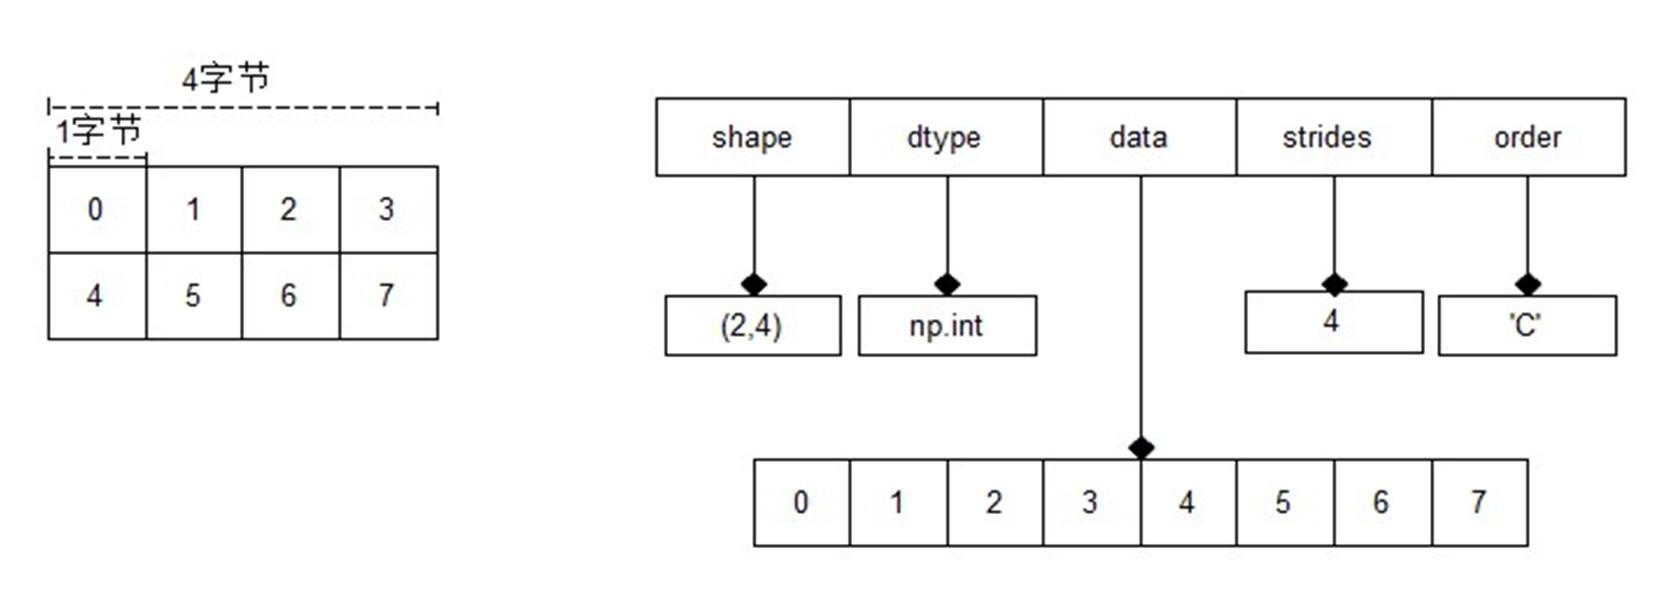
- shape ：数组形状，表示各维度大小
- dtype ：数据类型
- data  ：数据，一个指向内存中数据的指针
- stride：跨度，表示当前维度移动到下一个位置需要跨越的字节数。
- order ：顺序，创建数组时元素的存储顺序，如“C”为行主序，“F”为列主序等  <br>
ndarray 对象采用了数组的索引机制，将数组中的每个元素映射到内存块上，并且按照一定的布局对内存块进行排列，常用的布局方式有两种，即按行或者按列。

<a id=create_ndarray></a>
**2. 创建ndarray对象**
- 通过 NumPy 的内置函数 array( ) 可以创建 ndarray 对象，其语法格式如下：<code><font color=red size=4>
numpy.array(object, dtype = None, copy = True, order = None, subok = False, ndmin = 0)
</font></code>
&emsp;
- 参数说明
|**参数**|**描述说明**|
|:----|:---|
|object	|数组或嵌套的数列。|
|dtype	|可选参数，通过它可以更改数组的 [**数据类型**](#data_type)。|
|copy	|可选参数，表示数组能否被复制，默认是 True。|
|order	|指定数组元素在内存中的存储顺序（内存布局），有 2 个可选值，分别是 C（行优先）/ F（列优先）。|
|subok	|默认返回一个与基类类型一致的数组。|
|ndmin	|指定数组的最小维度。|

In [4]:
#【例4-12】建立一个一维ndarray数组。

import numpy as np
a = np.array([1,2,3])
print(a)

print(type(a))

[1 2 3]
<class 'numpy.ndarray'>


In [6]:
#【例4-13】创建二维数组。

import numpy as np 
a = np.array([[1,2,3], [4,5,6]])  
print(a)

#print(a.ndim) 

[[1 2 3]
 [4 5 6]]
2


In [8]:
#【例4-14】使用ndmin参数设置数组的最小维度。

import numpy as np 
a = np.array([1,2,3], ndmin=2)  
print(a)


[[1 2 3]]


In [20]:
#【例4-15】可以在创建数组时指定元素的类型，使用dtype 参数设置为数组类型为复数。
#https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

import numpy as np 
a = np.array([1, 2, 3], dtype = np.complex)  
#a = np.array([1, 2, 3], dtype = "complex") 
print(a)


[1 2 3]


<a id=data_type></a>

###   4.3. 3 NumPy 数据类型 [◀](#create_ndarray)
NumPy 作为 Python 的扩展包，它提供了比 Python 更加丰富的数据类型。  
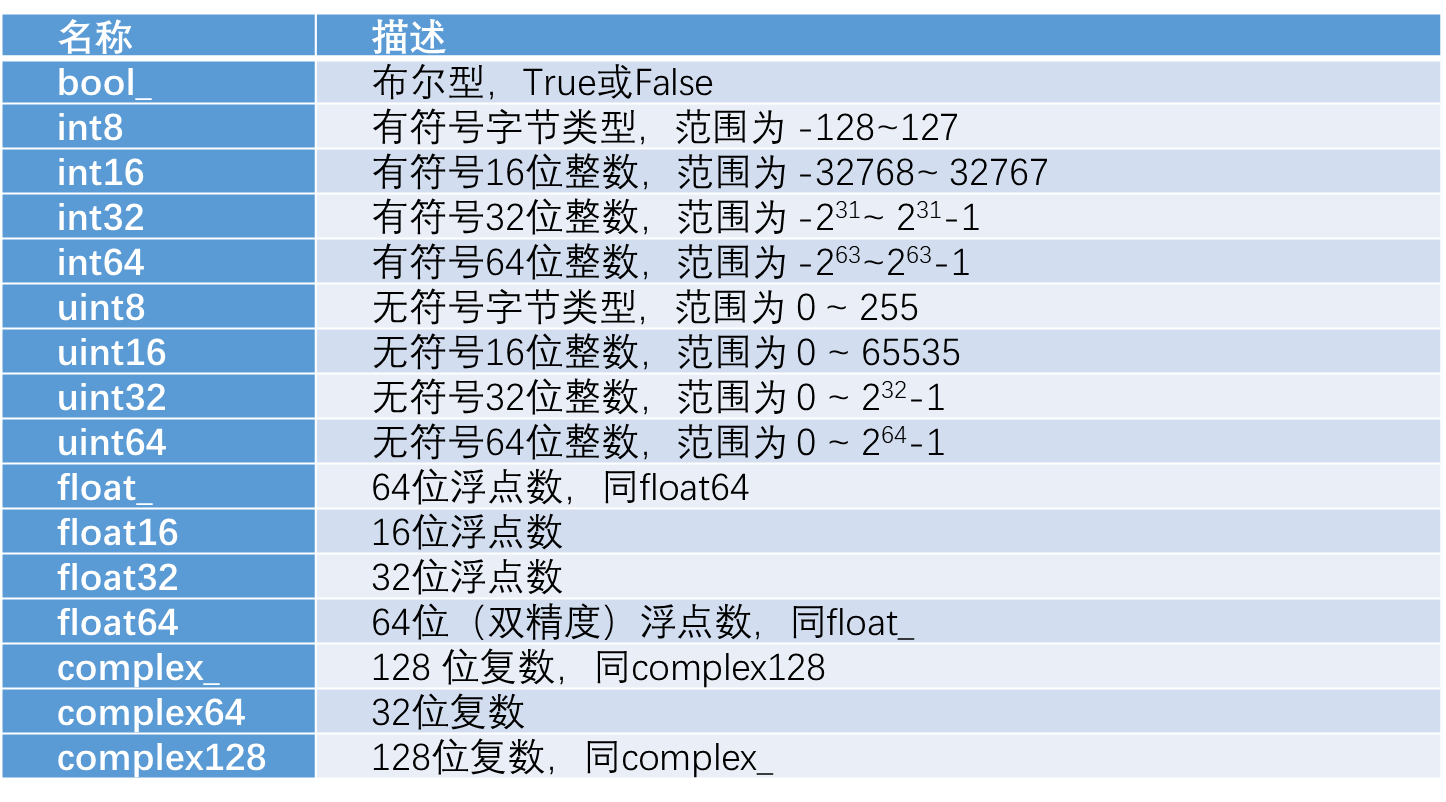  
int8、int16、int32、int64四种类型可以使用字符串' i1 '、' i2 '、' i4 '、' i8 ' 简写代替  
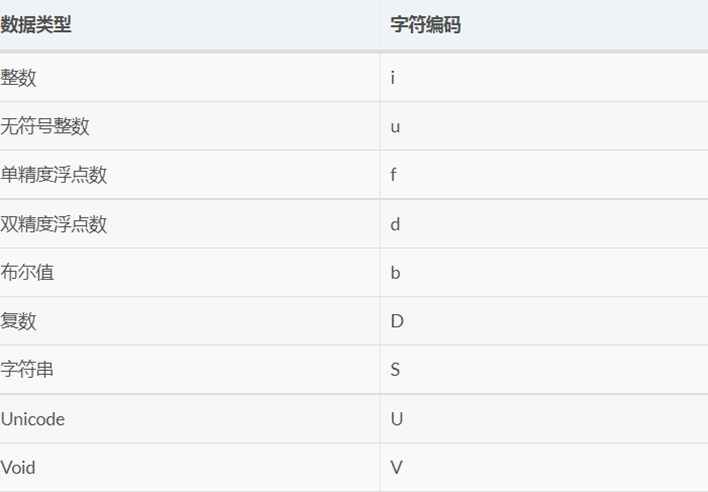  

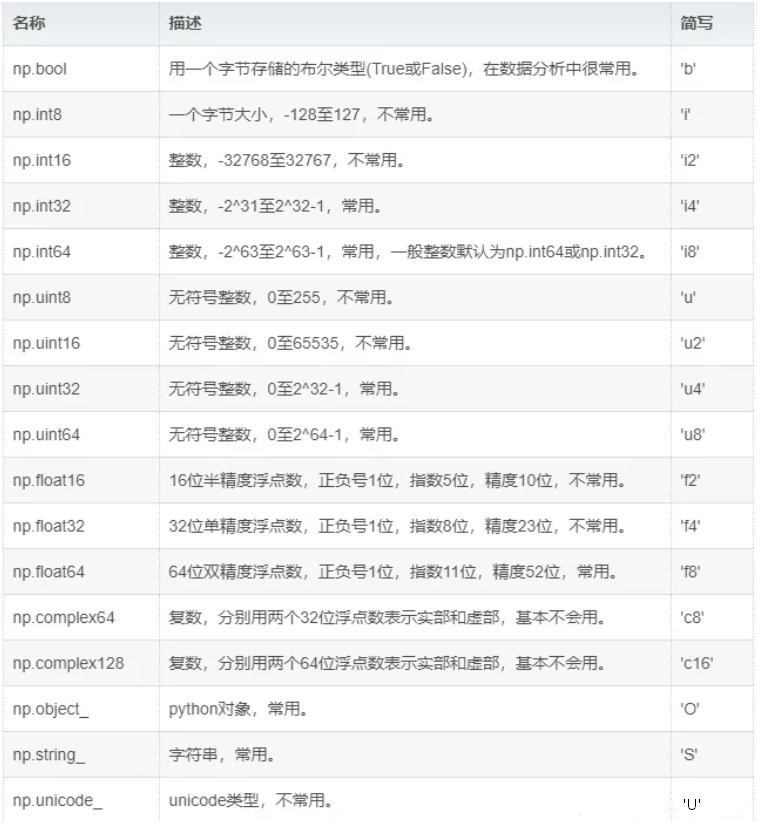

In [43]:
# 【例4-16】使用NumPy的数据类型创建一个float32类型的标量。
import numpy as np 
x1 = 5
x = np.float32(5)
print('x为:', x)
print('x类型为:',type(x))
print('x对象的data属性： ',x.data)
print('x对象的size属性：',x.size)
print('x对象的维数：',x.ndim)

y = np.bool_(x)
print('x转换为bool类型为：', y)

z = np.float16(y)
print('True值转换为float16类型为：', z)


x为: 5.0
x类型为: <class 'numpy.float32'>
x对象的data属性：  <memory at 0x000002B1A38B9BC0>
x对象的size属性： 1
x对象的维数： 0
x转换为bool类型为： True
True值转换为float16类型为： 1.0


####  1. 数据类型对象 (dtype)
数据类型对象（Data Type Object）又称 dtype 对象。  
主要用来描述与数组对应的内存区域是如何使用的，包括数组元素的：
  - 数据类型
  - 数据大小（字节数）
  - 字节顺序  
  
语法格式如下：<code> <font color=red size=4> numpy.dtype(object) </font></code>    
常见的 int64、float32 都是 dtype 对象的实例。  
同时，它也可以用来创建结构化数据。

**内建数据类型**

In [17]:
# 【例4-17】使用dtype对象设置数据类型，应用到 ndarray 中
'''
np.float32(5)会创建一个float32类型的标量，即单个值5.0，而不是一个ndarray对象。
np.array(5, dtype="float32")当创建一个只包含一个元素的数组时，无论这个元素是什么类型，这个数组都被视为零维数组（或者称为标量）
'''

import numpy as np 
x=np.array(5,dtype="float32")        # 与【例4-16】比较
print('x为:',x)
print('x类型为:',type(x))
print('x对象的data属性： ',x.data)
print('x对象的size属性：',x.size)
print('x对象的维度个数：',x.ndim)

y = np.array(x,dtype="bool_")
print('x转换为bool类型为：',y)

z = np.array(y,dtype="float16")
print('True值转换为float16类型为：',z)

x为: 5.0
x类型为: <class 'numpy.ndarray'>
x对象的data属性：  <memory at 0x000001E0606FF5E0>
x对象的size属性： 1
x对象的维数： 0
x转换为bool类型为： True
True值转换为float16类型为： 1.0


In [26]:
import numpy as np
# 使用numpy内建类型
dt = np.dtype(np.int32)
print(dt)

# 使用类型代码
# int32类型可以使用字符串'i4'简写代替
dt = np.dtype('i4')
print(dt)

# 使用类型字符串
dt = np.dtype('int32')
print(dt)

int32
int32
int32


####   2. 使用astype修改数据类型
数组建立之后，也可以修改数据类型。  
语法格式：<code> <font color=red size=4> array.astype(dtype,order=’K’,casting=’unsafe’,subok=True,copy=True) </font></code>    
例如将 y 设置成 folat32 类型，可以用：   
- y = y.astype("float32")   
      或者  
- y = y.astype(np.float32)  

In [31]:
import numpy as np

dt = np.dtype(np.int32)
y = np.array(5, dtype=dt)
print('y：', y)

y = y.astype("float32")
print('y astype：', y)



y： 5
y astype： 5.0


###   4.3. 4  NumPy 数组属性
NumPy 的数组中比较重要 ndarray 对象属性有：

|**属性**	|**说明**|
|:---|:---|
|<font color=blue>ndarray.ndim</font>	|**数组的轴**（维度）的个数，秩|
|<font color=blue>ndarray.shape</font>	|数组的维度，对于矩阵，n 行 m 列|
|ndarray.size	|数组元素的总个数，相当于 .shape 中 n*m 的值|
|<font color=blue>ndarray.dtype</font>	|数组的元素类型|
|ndarray.itemsize	|数组中每个元素的大小，以字节为单位|
|ndarray.data	|包含实际数组元素的缓冲区，由于一般通过数组的索引获取元素，所以通常不需要使用这个属性。|

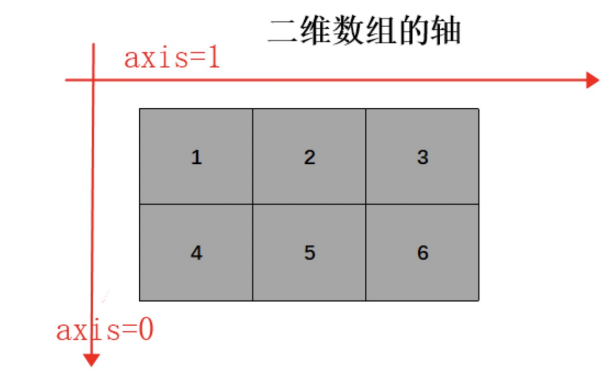

In [27]:
# 【例4-16】NumPy的数据类型使用。
import numpy as np 
x = np.float32(5)
print('x为:',x)
print('x对象的data属性（数据地址）： ', x.data)
print('x对象的size属性（数据元素个数）：', x.size)
print('x对象的itemsize属性（每个元素的存储大小）：', x.itemsize	)

x为: 5.0
x对象的data属性（数据地址）：  <memory at 0x000001E0606FF540>
x对象的size属性（数据元素个数）： 1
x对象的itemsize属性（每个元素的存储大小）： 4


####   <font color=blue>1. ndarray.ndim </font>秩
ndarray.ndim 返回一个整数，该整数会告诉我们数组有多少维（轴的数量）。

In [28]:
#【例4-19】 使用ndim返回数组的维数。
import numpy as np
a = np.array([0, 1, 2, 3, 4, 5, 6, 7])
#显示数组arr的rank
print(a)
print('原数组秩：', a.ndim)  

#b = a.reshape(2,4)  #使用reshape函数调整数组形状
b = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
print(b)
print ('调整后数组秩：', b.ndim)

[0 1 2 3 4 5 6 7]
原数组秩： 1
[[0 1 2 3]
 [4 5 6 7]]
调整后数组秩： 2


#### <font color=blue>2. ndarray.shape</font>  数组形状
   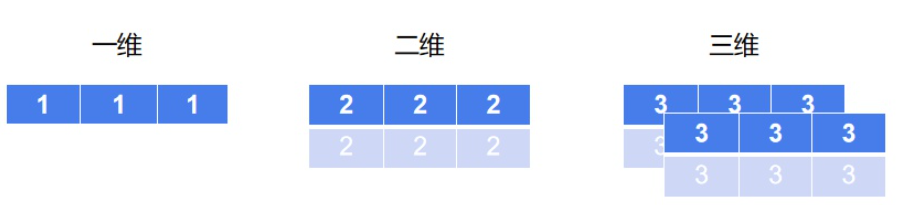
1. ndarray.shape：   
    - 属性返回一个整数元组，表示每个维度中数组的大小。  
           例如，一个二维数组，其维度表示"行数"和"列数"。  
           一个 2 行 3 列的二维数组的shape为(2,3) ，其值表明相应维度拥有的元素数量。    
    - ndarray.shape 形状也可以用于调整数组大小。  
    
2. ndarray.reshape( )：使用函数修改数组形状。   
       在不改变数据的条件下，将数组变形重构，调整各维度的大小。  


In [12]:
#1【例4-20】显示数组的维度。
import numpy as np   
a = np.array([[1,2,3],[4,5,6]]) 
print ('输出数组：\n', a)
print ('输出数组的维度：', a.shape)

print ('shape[0]代表行数：', a.shape[0])
print ('shape[1]代表列数：', a.shape[1])

输出数组：
 [[1 2 3]
 [4 5 6]]
输出数组的维度： (2, 3)
shape[0]代表行数： 2
shape[1]代表列数： 3


In [9]:
#2【例4-21】调整数组形状。
import numpy as np  
a = np.array([[1,2,3],[4,5,6]]) 
print ('原始数组：\n', a)

a.shape =  (3,2)  
print ('修改后的数组：\n', a)


原始数组：
 [[1 2 3]
 [4 5 6]]
修改后的数组：
 [[1 2]
 [3 4]
 [5 6]]


####  【补充】reshape( ) 数组变维
- 数组的形状指的是多维数组的行数和列数。
- Numpy 模块提供 reshape() 函数可以改变多维数组行数和列数，从而达到数组变维的目的。<br>
- 返回的数组是一个视图。<br>

因此数组变维即对数组形状的重塑：
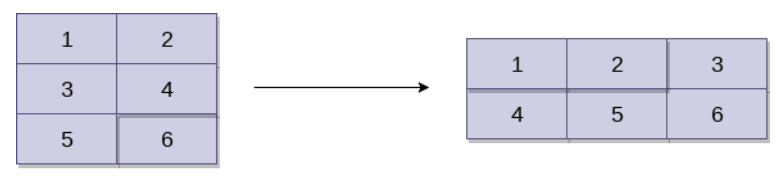

In [33]:
# NumPy 提供了一个调整数组形状的 reshape() 函数
'''reshape() 函数可以接受一个元组作为参数，用于指定了新数组的行数和列数。'''
import numpy as np 
arr1 = np.array([[1,2],[3,4],[5,6]]) 
print("原数组:\n",arr1) 

arr3 = arr1.reshape(2,3) 
print("新数组:\n",arr3)  

# 返回的数组是一个视图
# arr3[0,0]=100
# print(arr1)
# print(arr3)

原数组:
 [[1 2]
 [3 4]
 [5 6]]
新数组:
 [[1 2 3]
 [4 5 6]]
[[100   2]
 [  3   4]
 [  5   6]]
[[100   2   3]
 [  4   5   6]]


####   <font color=blue>3. ndarray.dtype</font> 数据类型
数据类型对象dtype是一个特殊的对象，包含ndarray将一块内存解析成特定数据类型所必需的信息。

In [58]:
#【例4-22】dtype数据类型对象。
myArr = np.array([1,2,3], dtype=np.float64)
myArr.dtype


dtype('float64')